In [1]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
import pandas as pd
import json
import seaborn as sns

In [2]:
password_response, time_response, survey_response = get_responses(3)

Total: 26


## Password Analysis

In [3]:
pd.DataFrame(password_response)
# password_response.head(5)

,password2,password2_recall1
0,ihtgoojd24,NaN
1,Bwmfd1!,NaN
2,6754$#,NaN
3,devi123,NaN
4,563842654,NaN
5,kee13jaye15!,NaN
6,lwaa(fas,NaN
7,Martin@97,NaN
8,TINMNPFYT246,NaN
9,ASD!@#qwe,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.453,28.630,15.469,29.669,147.708,243.538,12.105,96.265,8.017,70.176,15.129,48.560,12.011983
1,390.267,33.952,8.106,44.250,45.859,108.347,13.635,41.843,12.956,54.012,12.891,47.699,13.563617
2,5.307,6.465,8.567,4.670,35.472,165.960,10.517,22.076,14.942,39.105,10.935,20.554,5.742833
3,2.459,17.828,3.355,9.490,95.098,208.691,5.346,111.266,132.330,189.946,26.792,60.305,14.381767
4,2.549,11.269,3.547,10.821,69.477,100.045,2.908,27.254,49.278,27.942,5.165,32.414,5.711150


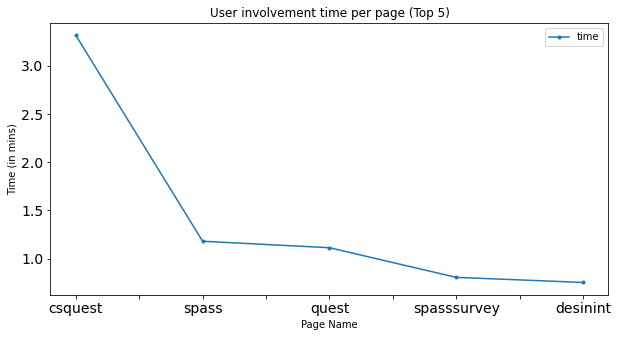

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [5]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [6]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
helpful,1.0,2.0,0.0,3.0,2.0,2.0,0.0,3.0,1.0,-1.0,...,3.0,3.0,2.0,1.0,1.0,2.0,2.0,1.807692,2.000000,1.019697
rewarding,1.0,2.0,-3.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,...,2.0,-2.0,1.0,2.0,3.0,3.0,-1.0,0.923077,1.000000,1.608448
structured,1.0,2.0,1.0,2.0,3.0,3.0,-1.0,2.0,1.0,-2.0,...,3.0,2.0,3.0,2.0,2.0,3.0,0.0,1.846154,2.000000,1.238390
beneficial,2.0,1.0,2.0,2.0,-2.0,2.0,1.0,3.0,1.0,-1.0,...,3.0,-3.0,2.0,1.0,2.0,3.0,-2.0,1.115385,2.000000,1.736412
well grouped,1.0,2.0,3.0,3.0,1.0,2.0,0.0,2.0,2.0,2.0,...,3.0,2.0,1.0,2.0,3.0,3.0,3.0,2.038462,2.000000,0.881139
organized,2.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,-1.0,...,3.0,3.0,2.0,1.0,2.0,3.0,-1.0,1.730769,2.000000,1.235063
ordered,2.0,2.0,0.0,0.0,-2.0,1.0,0.0,3.0,2.0,0.0,...,3.0,-2.0,2.0,1.0,2.0,3.0,-1.0,1.038462,2.000000,1.803834
useful,1.0,2.0,-2.0,2.0,-1.0,3.0,0.0,3.0,1.0,2.0,...,3.0,-3.0,2.0,2.0,2.0,3.0,-2.0,1.000000,2.000000,1.952816
clear,1.0,2.0,1.0,-1.0,-2.0,3.0,1.0,2.0,1.0,1.0,...,3.0,-3.0,3.0,0.0,3.0,3.0,-1.0,1.192308,1.192308,1.721740
easy to learn,2.0,-1.0,1.0,-1.0,-1.0,2.0,0.0,3.0,2.0,1.0,...,2.0,-2.0,2.0,0.0,2.0,3.0,0.0,0.884615,1.000000,1.571349


In [7]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')
    print(10*'*')


Perspicuity: 1.346153846153846
Perspicuity: 0.3099053434357051
**********
Aesthetics: 1.1538461538461537
Aesthetics: 0.3098472149941316
**********
Usefulness: 1.2115384615384615
Usefulness: 0.3992508516585152
**********
Clarity: 1.6634615384615385
Clarity: 0.38160792921463443
**********


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('qualitative/csquest_info.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
9-1,"[Email, Government Websites]",[Financial Websites],"[Financial Websites, Government Websites, Cour...","[Email, Financial Websites, E-commerce Websites]","[Social Media, Email, Financial Websites]","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Gaming Websites]","[Social Media, Email, Gaming Websites, E-comme...","[Social Media, E-commerce Websites]",...,"[Social Media, E-commerce Websites]","[Social Media, Email, Financial Websites]","[Email, Financial Websites, Government Website...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Gaming Websites, E-commerce Web...","[Social Media, Email, E-commerce Websites, Gov...","[Social Media, Content Websites, e.g. Audio/Vi...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, E-commerce Websites]","[Financial Websites, Gaming Websites, E-commer..."
11-1,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is good and very strong to create online ac...,This design is very nice and useful message ar...,it will identify areas for improvement and all...,The presentation was useful and very helpful.,i evalute the presentation of this design is v...,The design was really good looking. Easily to ...,A good presentation but a bad example. A memor...,I feel like it's very straight forward and rem...,...,The presentation of the design is very basic.\...,"Add numbers, special characters, capitalizatio...",It is clear and easy to follow. It's not comp...,It looks like a text message exchange between ...,social media presentation,The presentation is more excellent and easy to...,I create a password for an online account,The desgin look very creativity and very easy ...,It was simple and clean.,The presentation was to clear and more advance...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

# new_columns = {}
# for qsid in csquestquant.columns:
#     new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
# csquestquant.rename(columns=new_columns, inplace=True)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Novel,1.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,-2.0,-1.0,...,3.0,3.0,0.0,2.0,0.0,3.0,2.0,1.346154,1.346154,1.386237
To the Point,1.0,2.0,2.0,1.0,-2.0,3.0,0.0,1.0,1.0,1.0,...,3.0,2.0,0.0,2.0,3.0,2.0,-2.0,1.500000,2.000000,1.343587
Well Organized,-2.0,1.0,-3.0,-3.0,-1.0,2.0,0.0,2.0,0.0,1.0,...,1.0,-3.0,2.0,2.0,1.0,3.0,-1.0,0.423077,1.000000,1.812172
Informative,1.0,3.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,2.0,...,2.0,3.0,2.0,1.0,2.0,2.0,0.0,1.615385,2.000000,1.059289
Engaging,2.0,-1.0,1.0,-1.0,-1.0,2.0,0.0,3.0,2.0,1.0,...,2.0,-2.0,2.0,0.0,2.0,3.0,0.0,0.884615,1.000000,1.571349
Attractive,1.0,2.0,1.0,-1.0,-2.0,3.0,1.0,2.0,1.0,1.0,...,3.0,-3.0,3.0,0.0,3.0,3.0,-1.0,1.192308,1.192308,1.721740
Creative,1.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0,-2.0,1.0,...,3.0,3.0,2.0,1.0,2.0,2.0,1.0,1.538462,2.000000,1.196708
Easy to understand,2.0,2.0,3.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,...,-2.0,2.0,3.0,2.0,3.0,3.0,3.0,1.923077,2.000000,1.245018
Encouragement,3.0,3.0,-1.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,...,3.0,3.0,1.0,1.0,0.0,3.0,1.0,1.807692,2.000000,1.155889
Capable,2.0,3.0,1.0,2.0,3.0,2.0,0.0,2.0,1.0,0.0,...,2.0,2.0,3.0,2.0,2.0,3.0,3.0,1.884615,2.000000,0.916246


### First Password Survey

In [10]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass['std'] = fpass.std(axis=1)

fpass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,std
"I do not change my passwords, unless I have to.",5,6,4,5,4,1,5,5,6,7,...,2,6,6,5,6,7,1,4.961538,5.0,1.643877
I use different passwords for different online accounts that I have.,7,5,6,7,5,7,4,3,5,6,...,7,7,4,4,2,6,7,5.807692,6.0,1.361836
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,6,6,6,6,6,5,4,5,5,...,7,7,6,6,6,7,6,5.807692,6.0,0.862256
I do not include special characters in my password if it’s not required.,1,2,5,5,5,2,4,4,7,2,...,2,6,5,3,7,6,4,3.769231,4.0,1.892155


### Second Password Survey

In [11]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())
qualindex = ['8-1']
spassqual = spass.loc[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_consequences.csv')
spassqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a totally different strategy.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used a totally different strategy.,I used a variation of the strategy presented i...,...,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.


<AxesSubplot:xlabel='8-1'>

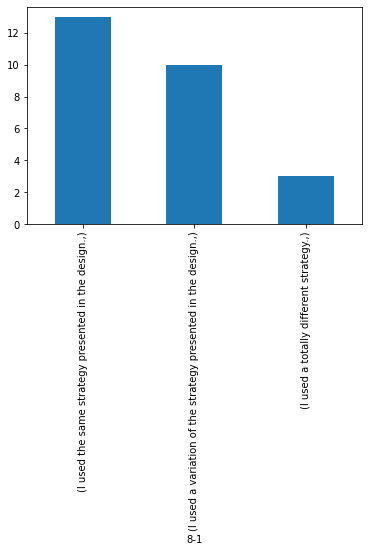

In [12]:
spassqual.T.value_counts().plot.bar()

In [13]:
spass = spass.drop(qualindex).fillna(0).astype(int)
spass.drop(attention.get('12'), inplace=True)

normqsid = ['3-1', '3-2', '3-3', '7-1']
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)


# normalize scale 1 to 8 to scale -3 to 3
spass = spass - 4
spass.update(spass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass['STD'] = spass.std(axis=1)

spass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Password Strength,1.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,3.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.269231,2.269231,0.884337
Motivation After Design,-1.0,3.0,2.0,2.0,1.0,3.0,0.0,2.0,2.0,1.0,...,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.000000,2.000000,1.018350
Hard to Remember,2.0,1.0,-2.0,0.0,-3.0,-1.0,0.0,0.0,-1.0,1.0,...,1.0,-2.0,-2.0,-1.0,1.0,-3.0,-3.0,-0.807692,-1.000000,1.656347
Guessed by Hacker,3.0,2.0,1.0,-2.0,-2.0,2.0,-1.0,-1.0,1.0,3.0,...,3.0,-3.0,-1.0,-2.0,2.0,3.0,-1.0,0.653846,1.000000,2.194270
Guessed by FnF,3.0,2.0,-1.0,-1.0,-2.0,2.0,1.0,-2.0,2.0,3.0,...,3.0,-2.0,-3.0,-1.0,3.0,3.0,2.0,0.769231,2.000000,2.341858
Stronger than Usual,-1.0,2.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,-2.0,...,2.0,3.0,2.0,0.0,2.0,3.0,3.0,1.384615,2.000000,1.661314
Helpful,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,-2.0,1.0,...,2.0,3.0,2.0,0.0,3.0,3.0,1.0,1.538462,2.000000,1.314688
Easy to think memory,1.0,2.0,0.0,2.0,1.0,3.0,0.0,1.0,-3.0,0.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,1.307692,2.000000,1.539608
Difficult for num&char,2.0,-2.0,-2.0,-1.0,-2.0,2.0,1.0,-2.0,-1.0,-2.0,...,-1.0,-3.0,0.0,0.0,2.0,3.0,-1.0,-0.307692,-1.000000,1.721333


### Demographics

In [14]:
# demo = pd.DataFrame(survey_response_df['14'].to_dict())

# new_index = {}
# for qsid in demo.index:
#     new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

# demo = demo.rename(new_index).transpose()
# demo.head(5)


demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo['race'] = demo['race'].str[0]


<AxesSubplot:xlabel='gender', ylabel='count'>

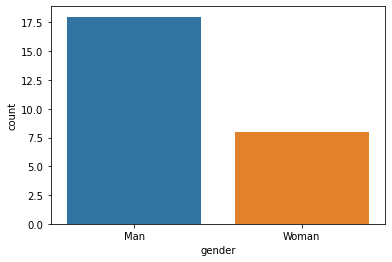

In [15]:
demo['gender'].value_counts()
sns.countplot(data=demo, x='gender', order=demo.gender.value_counts().index)

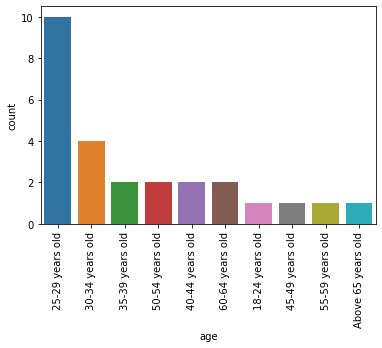

In [16]:
demo['age'].value_counts()
ax = sns.countplot(data=demo, x='age', order=demo.age.value_counts().index)
ax.tick_params(axis='x', rotation=90)


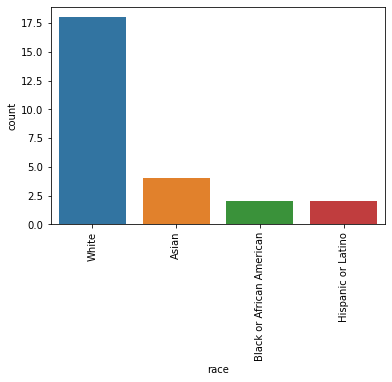

In [17]:
demo['race'].value_counts()
ax = sns.countplot(data=demo, x='race', order=demo.race.value_counts().index)
ax.tick_params(axis='x', rotation=90)
